<a href="https://colab.research.google.com/github/nataliaJanasiewicz/MIW/blob/main/projekt1/G12c_s22847_Proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Papier, kamień , nożyce przy użyciu łańcucha Markowa

Kamień Papier Nożyce

Kamień 1/3 1/3 1/3

Papier 1/3 1/3 1/3

Nożyce 1/3 1/3 1/3



how many games? 200
auto? y/ny

Game number:  1
you   vs   comp
Scissors  vs  Paper
you won (+1)
your score:  1.0

Game number:  2
prob for prev:  s  =  [0.33333333 0.33333333 0.33333333]
you   vs   comp
Scissors  vs  Paper
you won (+1)
your score:  2.0

Game number:  3
prob for prev:  s  =  [0.35333333 0.32333333 0.32333333]
you   vs   comp
Rock  vs  Paper
you lose (-1)
your score:  1.0

Game number:  4
prob for prev:  r  =  [0.33333333 0.33333333 0.33333333]
you   vs   comp
Scissors  vs  Rock
you lose (-1)
your score:  0.0

Game number:  5
prob for prev:  s  =  [0.34333333 0.34333333 0.31333333]
you   vs   comp
Scissors  vs  Scissors
it is a draw (0)
your score:  0.0

Game number:  6
prob for prev:  s  =  [0.36333333 0.33333333 0.30333333]
you   vs   comp
Scissors  vs  Paper
you won (+1)
your score:  1.0

Game number:  7
prob for prev:  s  =  [0.38333333 0.32333333 0.29333333]
you   vs   comp
Scissors  vs  Rock
you lose (-1)
your score:  0.0

Game number:  8
prob for prev:  s  =  [0.

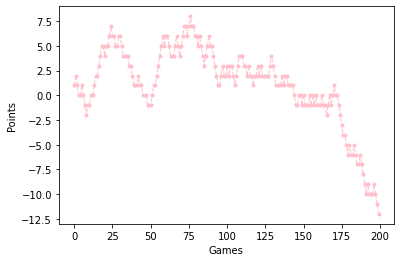

W:  64 , D:  60 , L:  76


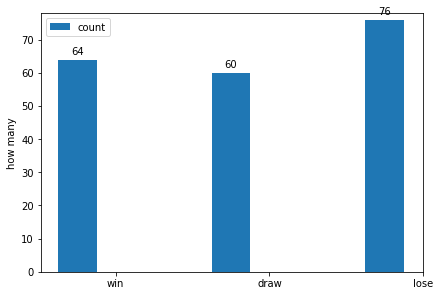

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gamesCount= input('how many games? ')
gc = int(gamesCount)
game = 1
auto = input('auto? y/n ')

#possible states
states = ['Rock','Paper','Scissors']

#all probabilities
prob = np.array([[1/3, 1/3, 1/3],
                  [1/3, 1/3, 1/3],
                  [1/3, 1/3, 1/3]])
#learning rate
alfa = 0.02

#all points
indiv_points = np.zeros(gc)
sum_points = [0]*gc

#previous choice
prev = ''

#result
result = 0

def fight(com,user):
  #draw
  if(com == user):
    print('it is a draw (0)')
  #win
  if((com == 'r' and user == 'p') or (com == 'p' and user == 's') or (com == 's' and user == 'r')):
    print('you won (+1)')
    indiv_points[game -2] = 1
  #lose
  if((com == 'p' and user == 'r') or (com == 's' and user == 'p') or (com == 'r' and user == 's')):
    print('you lose (-1)')
    indiv_points[game -2] = -1

def learn2(i,now):
    if(now == 'r' and prob[i][1] < 1-(2*alfa) and prob[i][0] > 0+alfa and prob[i][2] > 0+alfa ):
      prob[i][1] += alfa
      prob[i][0] -= alfa/2
      prob[i][2] -= alfa/2
    if(now == 'p' and prob[i][2] < 1-(2*alfa) and prob[i][0] > 0+alfa and prob[i][1] > 0+alfa):
      prob[i][2] += alfa
      prob[i][0] -= alfa/2
      prob[i][1] -= alfa/2
    if(now == 's' and prob[i][0] < 1-(2*alfa) and prob[i][1] > 0+alfa and prob[i][2] > 0+alfa):
      prob[i][0] += alfa
      prob[i][1] -= alfa/2
      prob[i][2] -= alfa/2

def playAuto():
    return np.random.choice(['r','p','s'], p=[0.2,0.2,0.6])
    

def firstGame():
  return np.random.choice(['r','p','s'], p=[1/3,1/3,1/3])

def comChoice2(i):
    return np.random.choice(['r','p','s'], p = prob[i])

def getIndex(x):
    if(x == 'r'):
        return 0
    if(x == 'p'):
        return 1
    if(x == 's'):
        return 2

def getName(i):
    return states[int(i)]

while game <= gc:
    print('\nGame number: ', game)
    game = game + 1
    if(auto == 'y'):
      user = playAuto()
    else:
      user= input('choose r,p,s? ')
    if(prev == ''):
        com = firstGame()
        print('you   vs   comp')
        print(getName(getIndex(user)), ' vs ', getName(getIndex(com))) 
        fight(com, user)
        prev = user
    else:
        print('prob for prev: ', prev, ' = ',prob[getIndex(prev)])
        com = comChoice2(getIndex(prev))
        print('you   vs   comp')
        print(getName(getIndex(user)), ' vs ', getName(getIndex(com)))
        fight(com, user)
        learn2(getIndex(prev), user)
        prev = user
    result = result + indiv_points[game -2]
    sum_points[game-2] = result
    print('your score: ', result)

print('\nTHE END')
print('individual points')
print(indiv_points)
print('the course of the game')
print(sum_points)
print('====== your score: ', result, ' =======')

#graph for sum
plt.plot(sum_points, color='pink', marker='o', linestyle='dashed',linewidth=1, markersize=3)
#plt.plot(sum_points, color='pink')
plt.ylabel('Points')
plt.xlabel('Games')
plt.show()

#graph for individual points
sts = ('win', 'draw', 'lose')
 
win = np.count_nonzero(indiv_points == 1)
draw =np.count_nonzero(indiv_points == 0)
lose =np.count_nonzero(indiv_points == -1)
print('W: ',win,', D: ',draw, ', L: ', lose)
count = {
    'count': (win,draw,lose)
}
x = np.arange(len(sts))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in count.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('how many')
ax.set_title('')
ax.set_xticks(x + width, sts)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, (max(win,draw,lose)+2))

plt.show()